Index(['time', 'dCHA', 'dMAG', 'vCHA', 'vMAG'], dtype='object')


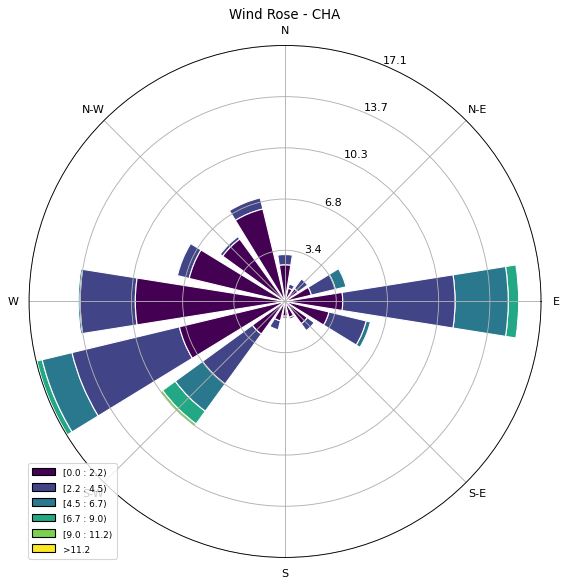

<Figure size 640x480 with 0 Axes>

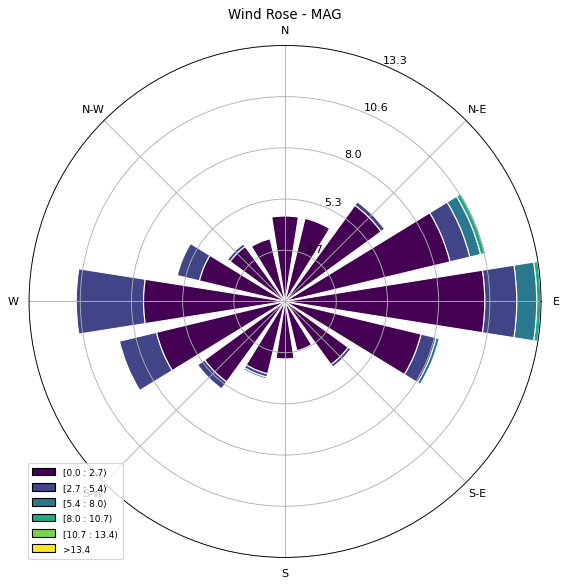

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# Load your data
# Replace 'your_data.csv' with your file path
df = pd.read_csv('Wind Speed and Direction.csv', sep=';', decimal=',')
print(df.columns)
# Convert date column to datetime
df['time'] = pd.to_datetime(df['time'], format='%d.%m.%Y %H:%M')

# Function to plot wind rose for one station
def plot_wind_rose(directions, speeds, station_name):
    ax = WindroseAxes.from_ax()
    ax.bar(directions, speeds, normed=True, opening=0.8, edgecolor='white', cmap=plt.cm.viridis)
    ax.set_legend()
    ax.set_title(f"Wind Rose - {station_name}")
    return ax

# Plot for Station 1
plot_wind_rose(df["dCHA"], df["vCHA"], "CHA")

# Plot for Station 2
plt.figure()
plot_wind_rose(df["dMAG"], df["vMAG"], "MAG")

plt.show()

Index(['time', 'dCHA', 'dMAG', 'vCHA', 'vMAG'], dtype='object')


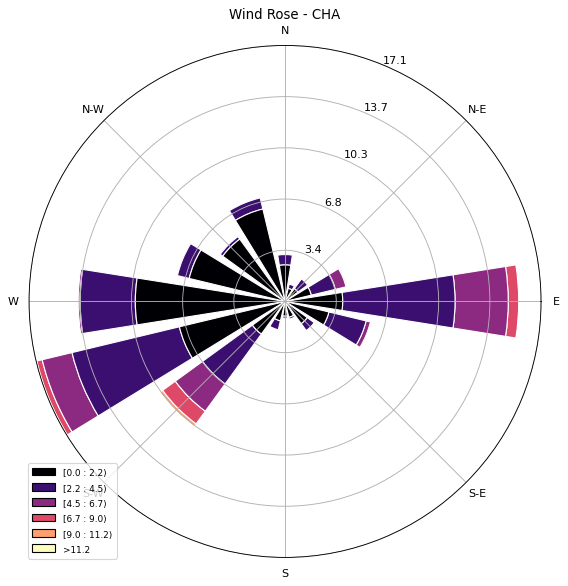

<Figure size 640x480 with 0 Axes>

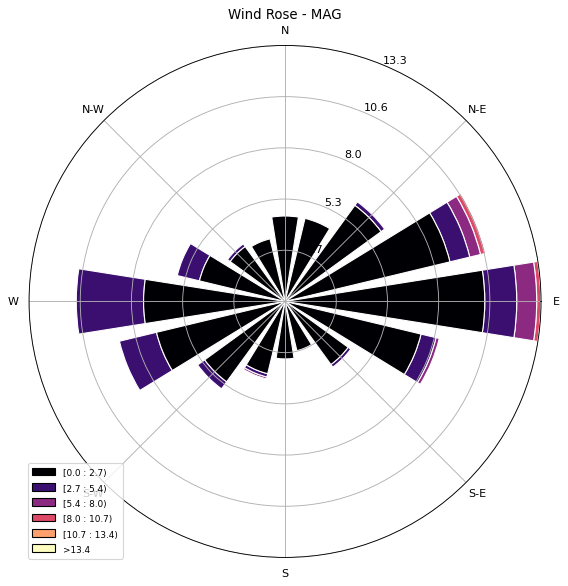

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# Load your data
df = pd.read_csv('Wind Speed and Direction.csv', sep=';', decimal=',')
print(df.columns)

# Convert date column to datetime
df['time'] = pd.to_datetime(df['time'], format='%d.%m.%Y %H:%M')

# Function to plot wind rose for one station
def plot_wind_rose(directions, speeds, station_name):
    ax = WindroseAxes.from_ax()

    # Use a colormap (e.g., 'viridis', 'plasma', 'inferno', etc.)
    cmap = plt.cm.magma  # You can change this to another colormap
    
    # Plot the wind rose with the colormap applied to the speeds
    ax.bar(directions, speeds, normed=True, opening=0.8, edgecolor='white', cmap=cmap)
    ax.set_legend()
    ax.set_title(f"Wind Rose - {station_name}")
    return ax

# Plot for Station 1
plot_wind_rose(df["dCHA"], df["vCHA"], "CHA")

# Plot for Station 2
plt.figure()
plot_wind_rose(df["dMAG"], df["vMAG"], "MAG")

plt.show()